In [2]:
from img_show import *
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [34]:

w=160
h=120
w=640
h=480


data_from_txt,len_=get_image_from_txtFile(w,h,"../output.txt",np.uint16)
print(data_from_txt.shape,len_)

(307200,) 5711


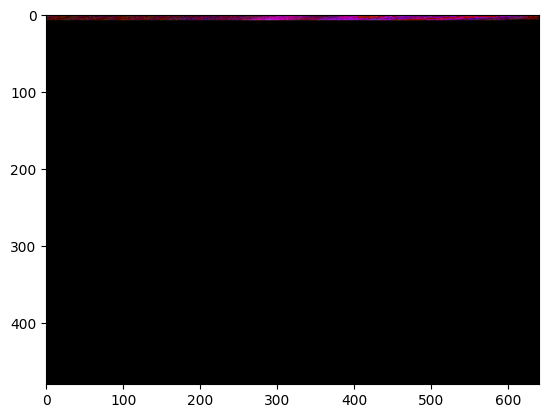

In [35]:
rgb=RGB565_to_RGB888(data_from_txt,h,w)
rgb.shape
plt.imshow(rgb)